<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="archaea"
dataset = 2
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores archaea dataset 2, con valores atípicos.
Valores del documento csv.

         X0     X1     X2     X3     X4      X5     X6      X7     X8      X9  \
0     9.744  6.154  1.538  3.077  0.513   2.051  1.538   5.641  2.051   4.103   
1    14.068  2.662  1.141  5.323  0.000   4.183  2.281   9.125  0.000   5.703   
2    10.795  6.250  1.420  4.830  0.000   6.534  1.420   7.386  0.568   3.977   
3    10.825  4.639  2.577  3.093  1.546   2.577  0.000   6.701  3.608   9.278   
4     5.128  6.410  3.846  7.692  0.641  11.538  0.641   3.846  0.641   6.410   
..      ...    ...    ...    ...    ...     ...    ...     ...    ...     ...   
995   6.040  3.356  4.362  3.020  0.671   3.691  2.349   4.362  1.007  14.094   
996  10.256  4.103  1.538  1.538  1.538   1.538  2.051  10.769  4.103   7.692   
997  16.114  7.109  0.474  1.896  0.474   7.583  0.948   8.057  2.370   0.474   
998   2.510  2.510  5.021  6.276  0.418   5.858  2.092   6.695  3.34

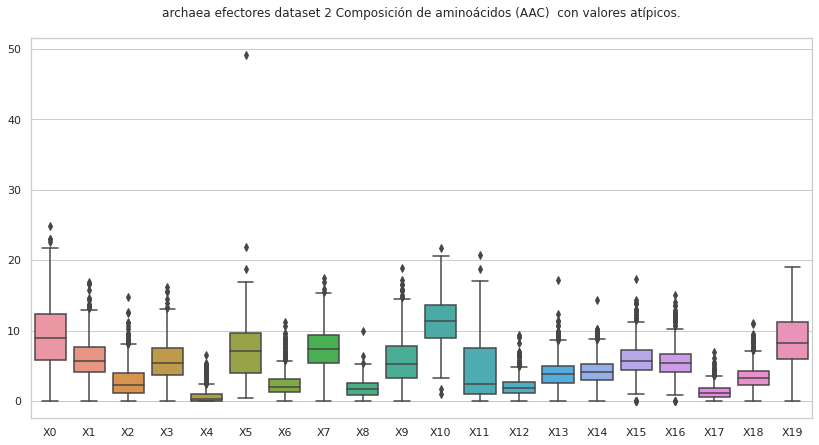

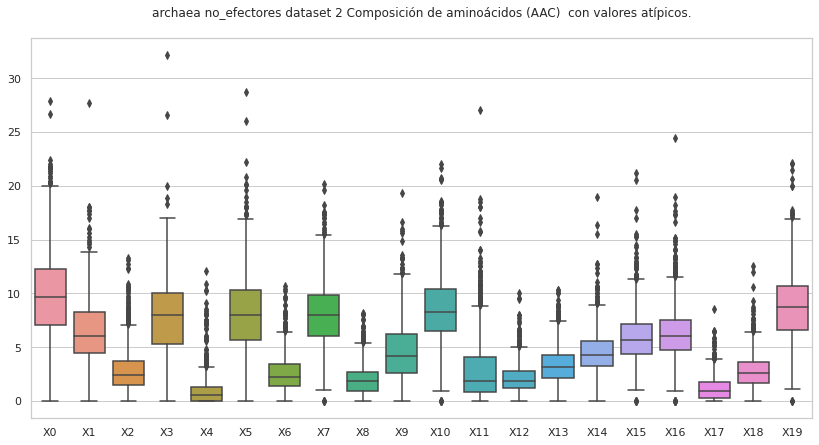

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores archaea dataset 2, sin valores atípicos.
Valores del documento csv.

         X0     X1     X2     X3     X4      X5     X6      X7     X8      X9  \
0     9.744  6.154  1.538  3.077  0.513   2.051  1.538   5.641  2.051   4.103   
1    14.068  2.662  1.141  5.323  0.000   4.183  2.281   9.125  0.000   5.703   
2    10.795  6.250  1.420  4.830  0.000   6.534  1.420   7.386  0.568   3.977   
3    10.825  4.639  2.577  3.093  1.546   2.577  0.000   6.701  3.608   9.278   
4     5.128  6.410  3.846  7.692  0.641  11.538  0.641   3.846  0.641   6.410   
..      ...    ...    ...    ...    ...     ...    ...     ...    ...     ...   
995   6.040  3.356  4.362  3.020  0.671   3.691  2.349   4.362  1.007  14.094   
996  10.256  4.103  1.538  1.538  1.538   1.538  2.051  10.769  4.103   7.692   
997  16.114  7.109  0.474  1.896  0.474   7.583  0.948   8.057  2.370   0.474   
998   2.510  2.510  5.021  6.276  0.418   5.858  2.092   6.695  3.34

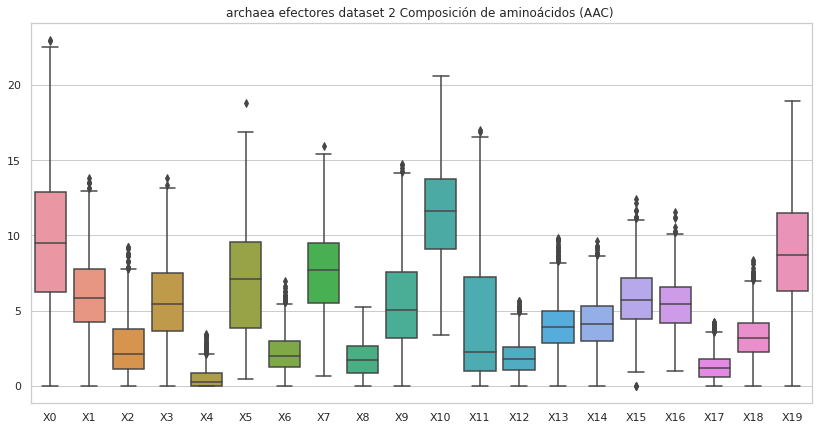

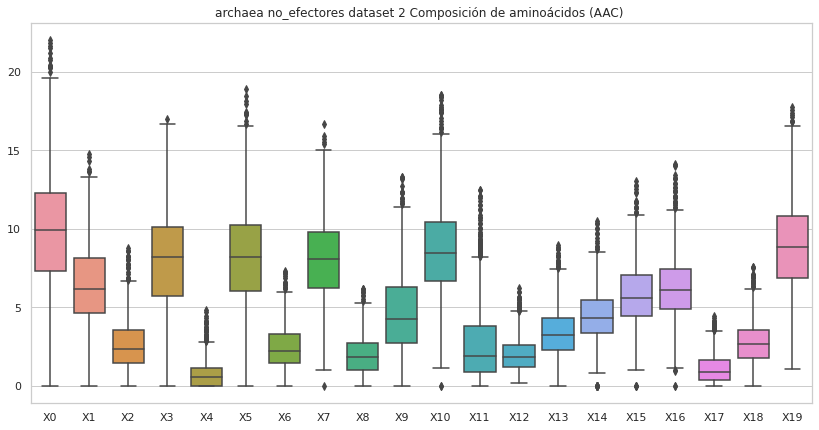

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores archaea dataset 2, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.029208  0.001537  0.009224  0.006149  0.018447  0.016910  0.006149   
1    0.019266  0.000000  0.007290  0.005728  0.007290  0.012497  0.000000   
2    0.022130  0.000000  0.009900  0.013395  0.008736  0.015142  0.001165   
3    0.029458  0.004208  0.008417  0.007014  0.025250  0.018236  0.009819   
4    0.037163  0.004645  0.055745  0.083617  0.009291  0.027873  0.004645   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.016932  0.001881  0.008466  0.010347  0.027279  0.012229  0.002822   
996  0.017296  0.002594  0.002594  0.002594  0.006919  0.018161  0.006919   
997  0.041126  0.001210  0.004838  0.019354  0.012096  0.020563  0.006048   
998  0.025290  0.004215  0.063224  0.059009  0.071654  0.067439  0.033720   
999  0.02

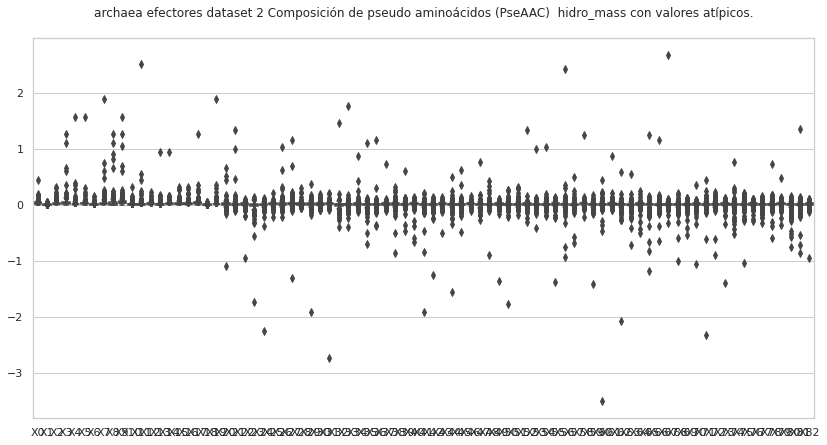

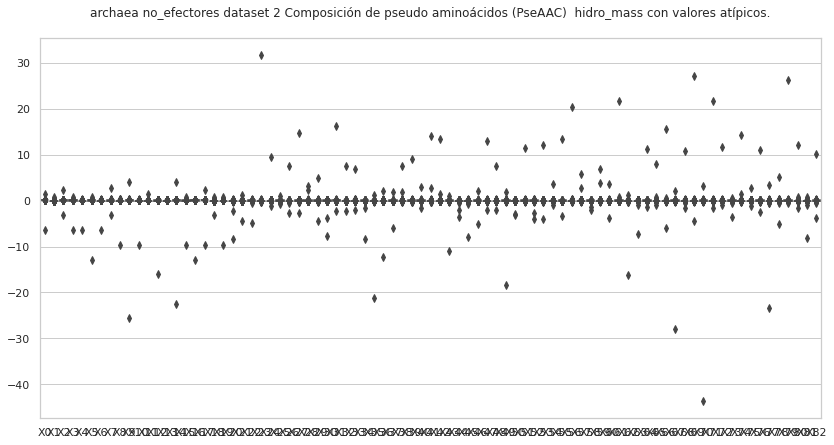

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores archaea dataset 2, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.029208  0.001537  0.009224  0.006149  0.018447  0.016910  0.006149   
1    0.019266  0.000000  0.007290  0.005728  0.007290  0.012497  0.000000   
2    0.022130  0.000000  0.009900  0.013395  0.008736  0.015142  0.001165   
3    0.029458  0.004208  0.008417  0.007014  0.025250  0.018236  0.009819   
4    0.037163  0.004645  0.055745  0.083617  0.009291  0.027873  0.004645   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.016932  0.001881  0.008466  0.010347  0.027279  0.012229  0.002822   
996  0.017296  0.002594  0.002594  0.002594  0.006919  0.018161  0.006919   
997  0.041126  0.001210  0.004838  0.019354  0.012096  0.020563  0.006048   
998  0.025290  0.004215  0.063224  0.059009  0.071654  0.067439  0.033720   
999  0.02

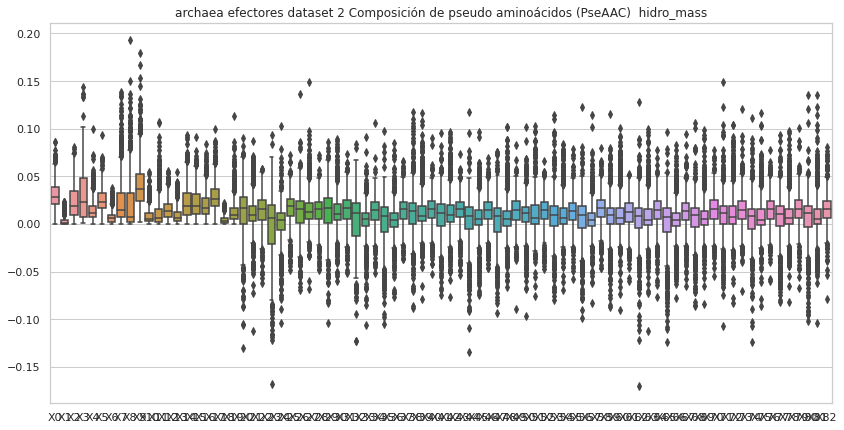

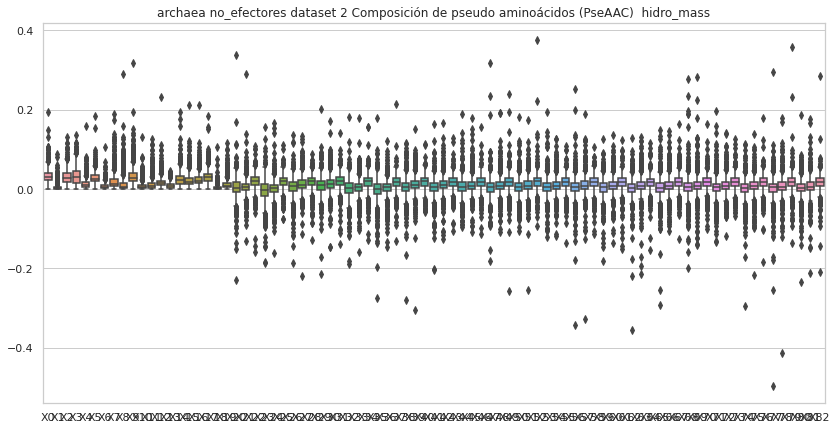

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores archaea dataset 2, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.053806  0.002832  0.016992  0.011328  0.033983  0.031151  0.011328   
1    0.048228  0.000000  0.018248  0.014338  0.018248  0.031283  0.000000   
2    0.038068  0.000000  0.017031  0.023041  0.015027  0.026047  0.002004   
3    0.074927  0.010704  0.021408  0.017840  0.064223  0.046383  0.024976   
4    0.051063  0.006383  0.076594  0.114891  0.012766  0.038297  0.006383   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.055000  0.006111  0.027500  0.033611  0.088611  0.039722  0.009167   
996  0.032304  0.004846  0.004846  0.004846  0.012922  0.033919  0.012922   
997  0.064006  0.001883  0.007530  0.030121  0.018825  0.032003  0.009413   
998  0.024703  0.004117  0.061757  0.057639  0.069991  0.065874  0.032937   
999  0.049527  

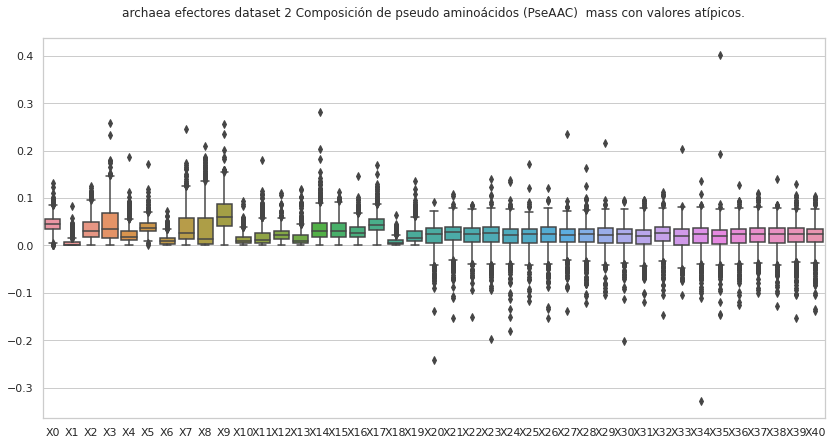

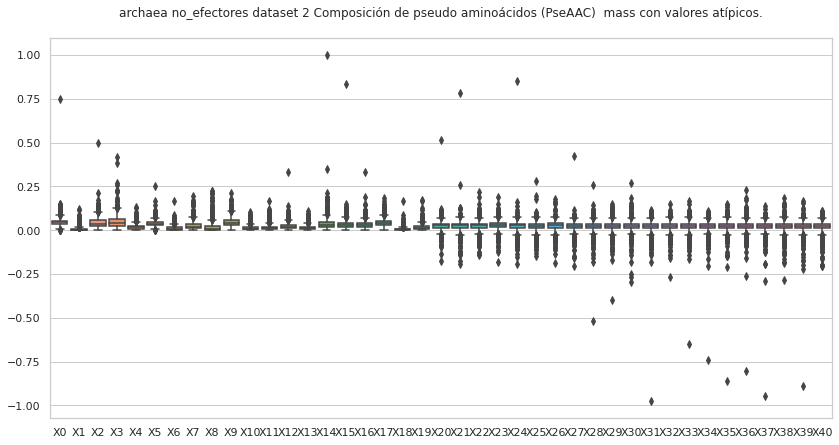

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores archaea dataset 2, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.053806  0.002832  0.016992  0.011328  0.033983  0.031151  0.011328   
1    0.048228  0.000000  0.018248  0.014338  0.018248  0.031283  0.000000   
2    0.038068  0.000000  0.017031  0.023041  0.015027  0.026047  0.002004   
3    0.074927  0.010704  0.021408  0.017840  0.064223  0.046383  0.024976   
4    0.051063  0.006383  0.076594  0.114891  0.012766  0.038297  0.006383   
..        ...       ...       ...       ...       ...       ...       ...   
993  0.000000  0.025596  0.025596  0.093850  0.000000  0.051191  0.000000   
996  0.032304  0.004846  0.004846  0.004846  0.012922  0.033919  0.012922   
997  0.064006  0.001883  0.007530  0.030121  0.018825  0.032003  0.009413   
998  0.024703  0.004117  0.061757  0.057639  0.069991  0.065874  0.032937   
999  0.049527  0.000000  

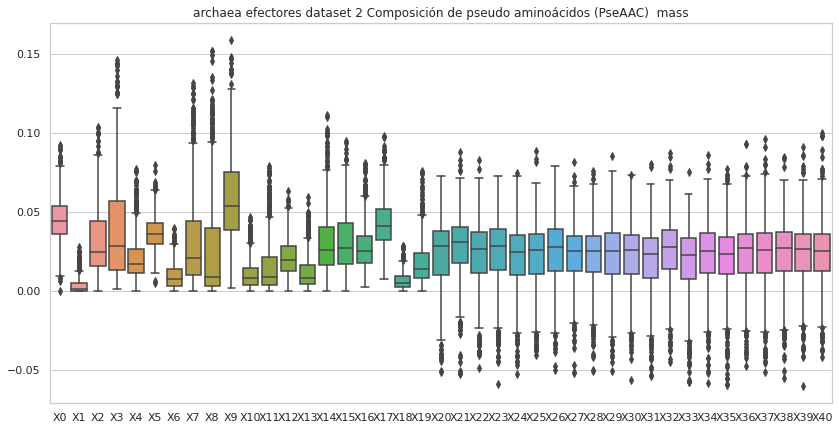

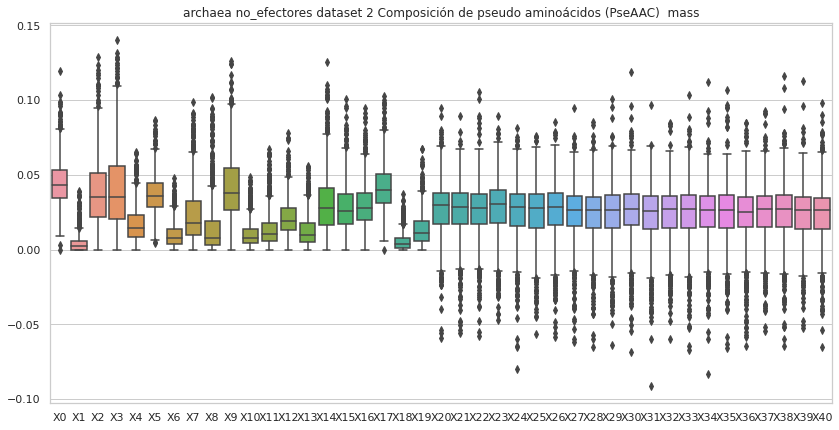

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores archaea dataset 2, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.038588  0.002031  0.012186  0.008124  0.024371  0.022340  0.008124   
1    0.026125  0.000000  0.009885  0.007767  0.009885  0.016946  0.000000   
2    0.035485  0.000000  0.015875  0.021477  0.014007  0.024279  0.001868   
3    0.033514  0.004788  0.009575  0.007979  0.028726  0.020747  0.011171   
4    0.037279  0.004660  0.055919  0.083878  0.009320  0.027959  0.004660   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.017411  0.001935  0.008706  0.010640  0.028052  0.012575  0.002902   
996  0.027315  0.004097  0.004097  0.004097  0.010926  0.028681  0.010926   
997  0.067124  0.001974  0.007897  0.031588  0.019742  0.033562  0.009871   
998  0.025711  0.004285  0.064278  0.059993  0.072849  0.068563  0.034282   
999  0.034180 

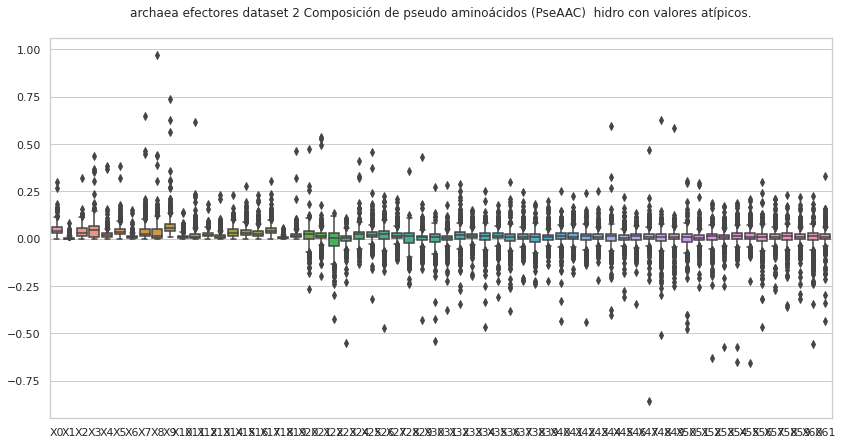

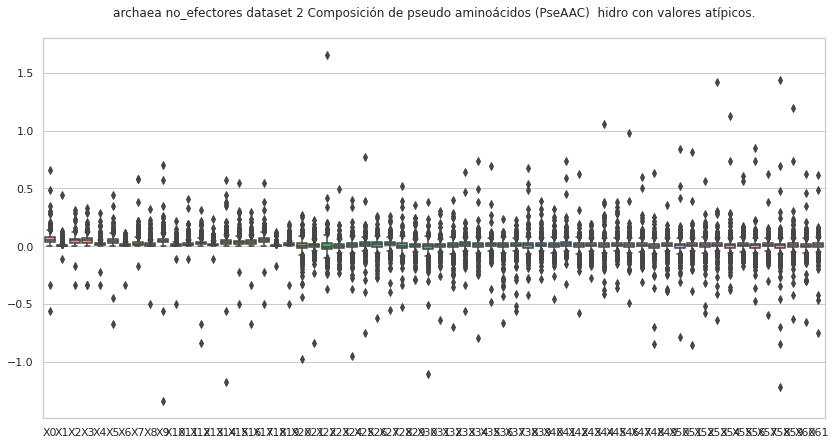

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores archaea dataset 2, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.038588  0.002031  0.012186  0.008124  0.024371  0.022340  0.008124   
1    0.026125  0.000000  0.009885  0.007767  0.009885  0.016946  0.000000   
2    0.035485  0.000000  0.015875  0.021477  0.014007  0.024279  0.001868   
3    0.033514  0.004788  0.009575  0.007979  0.028726  0.020747  0.011171   
4    0.037279  0.004660  0.055919  0.083878  0.009320  0.027959  0.004660   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.017411  0.001935  0.008706  0.010640  0.028052  0.012575  0.002902   
996  0.027315  0.004097  0.004097  0.004097  0.010926  0.028681  0.010926   
997  0.067124  0.001974  0.007897  0.031588  0.019742  0.033562  0.009871   
998  0.025711  0.004285  0.064278  0.059993  0.072849  0.068563  0.034282   
999  0.034180  0.000

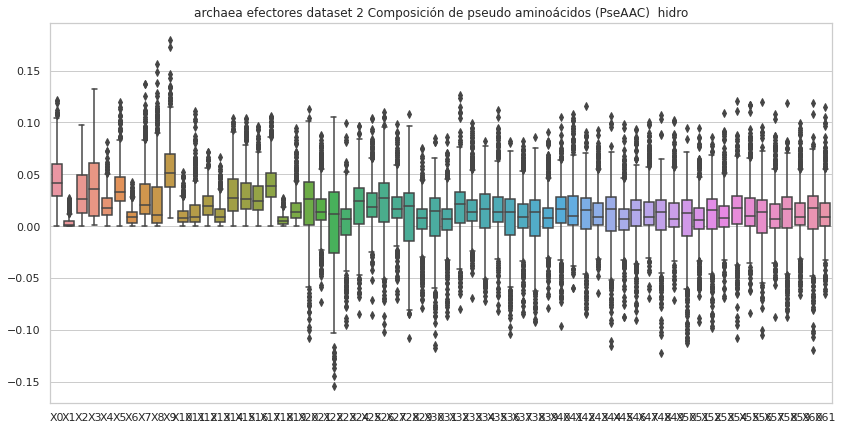

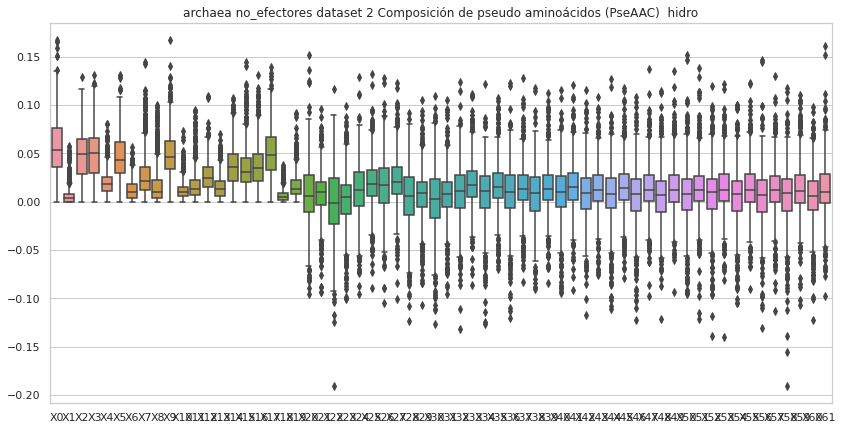

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores archaea dataset 2, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.005443 -0.018635 -0.084997 -0.007834  0.002934 -0.015078  0.046394   
1   -0.027923 -0.077917  0.055378 -0.034381 -0.085988  0.008007  0.077016   
2    0.023057  0.030394  0.147859  0.089264 -0.045016  0.050764  0.016967   
3    0.007678 -0.063872  0.030566 -0.079442 -0.095993 -0.145327  0.064974   
4    0.039778 -0.020321 -0.075481 -0.036650 -0.078937 -0.097488 -0.092399   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.013519 -0.003511  0.034309  0.041849  0.003351  0.099324 -0.014219   
996 -0.001671 -0.001633 -0.062107 -0.074465  0.104763 -0.001856  0.164325   
997 -0.145829  0.071592 -0.035244 -0.073373 -0.002276 -0.028309 -0.012430   
998 -0.097416 -0.001915 -0.090449  0.010720 -0.042461  0.079594 -0.040465   
999  0.030004  

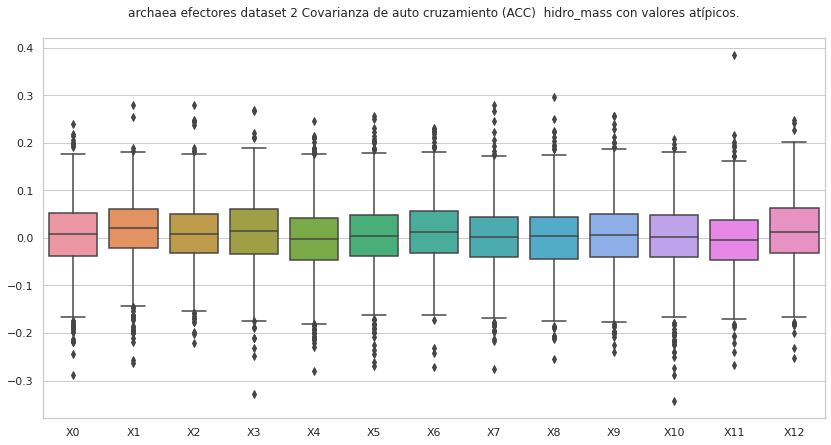

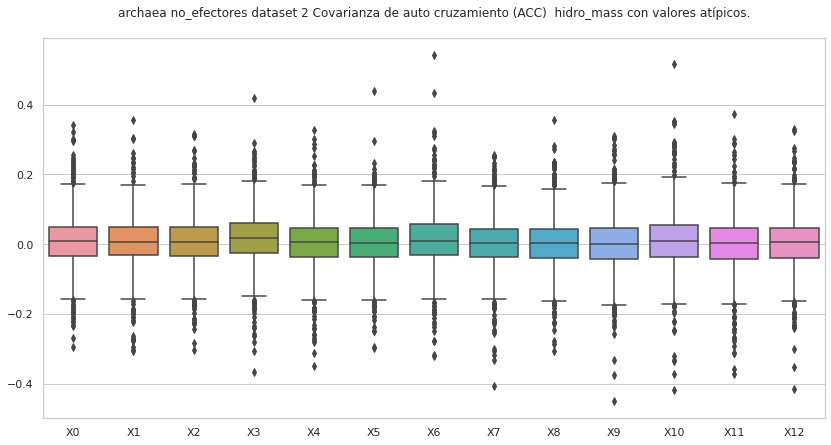

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores archaea dataset 2, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.005443 -0.018635 -0.084997 -0.007834  0.002934 -0.015078  0.046394   
1   -0.027923 -0.077917  0.055378 -0.034381 -0.085988  0.008007  0.077016   
2    0.023057  0.030394  0.147859  0.089264 -0.045016  0.050764  0.016967   
3    0.007678 -0.063872  0.030566 -0.079442 -0.095993 -0.145327  0.064974   
4    0.039778 -0.020321 -0.075481 -0.036650 -0.078937 -0.097488 -0.092399   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.013519 -0.003511  0.034309  0.041849  0.003351  0.099324 -0.014219   
996 -0.001671 -0.001633 -0.062107 -0.074465  0.104763 -0.001856  0.164325   
997 -0.145829  0.071592 -0.035244 -0.073373 -0.002276 -0.028309 -0.012430   
998 -0.097416 -0.001915 -0.090449  0.010720 -0.042461  0.079594 -0.040465   
999  0.030004  

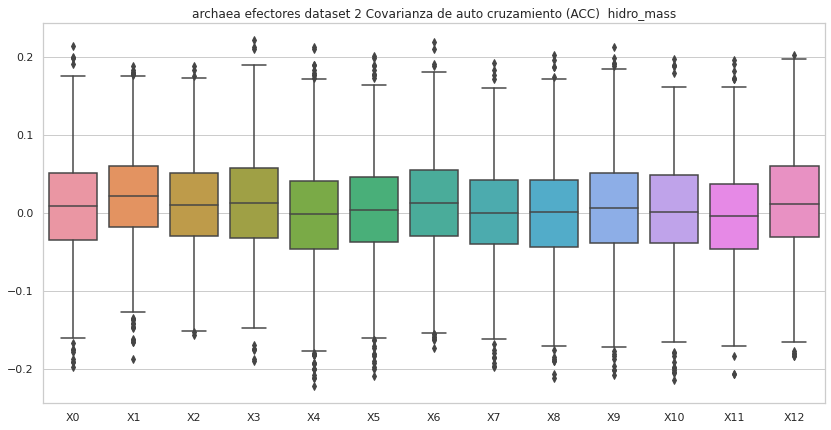

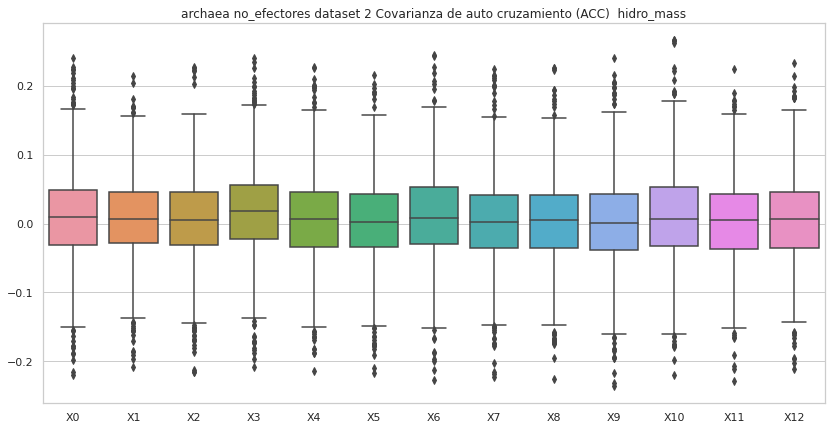

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores archaea dataset 2, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.005443 -0.018635 -0.084997 -0.007834  0.002934 -0.015078  0.046394   
1   -0.027923 -0.077917  0.055378 -0.034381 -0.085988  0.008007  0.077016   
2    0.023057  0.030394  0.147859  0.089264 -0.045016  0.050764  0.016967   
3    0.007678 -0.063872  0.030566 -0.079442 -0.095993 -0.145327  0.064974   
4    0.039778 -0.020321 -0.075481 -0.036650 -0.078937 -0.097488 -0.092399   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.013519 -0.003511  0.034309  0.041849  0.003351  0.099324 -0.014219   
996 -0.001671 -0.001633 -0.062107 -0.074465  0.104763 -0.001856  0.164325   
997 -0.145829  0.071592 -0.035244 -0.073373 -0.002276 -0.028309 -0.012430   
998 -0.097416 -0.001915 -0.090449  0.010720 -0.042461  0.079594 -0.040465   
999  0.030004  0.0417

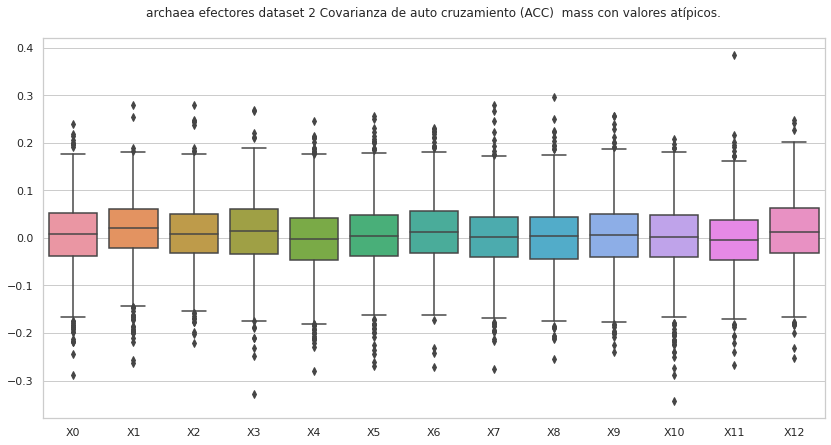

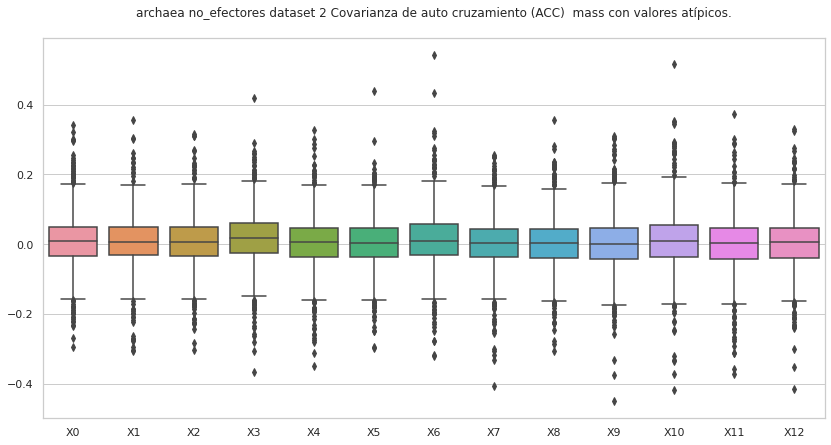

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores archaea dataset 2, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.005443 -0.018635 -0.084997 -0.007834  0.002934 -0.015078  0.046394   
1   -0.027923 -0.077917  0.055378 -0.034381 -0.085988  0.008007  0.077016   
2    0.023057  0.030394  0.147859  0.089264 -0.045016  0.050764  0.016967   
3    0.007678 -0.063872  0.030566 -0.079442 -0.095993 -0.145327  0.064974   
4    0.039778 -0.020321 -0.075481 -0.036650 -0.078937 -0.097488 -0.092399   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.013519 -0.003511  0.034309  0.041849  0.003351  0.099324 -0.014219   
996 -0.001671 -0.001633 -0.062107 -0.074465  0.104763 -0.001856  0.164325   
997 -0.145829  0.071592 -0.035244 -0.073373 -0.002276 -0.028309 -0.012430   
998 -0.097416 -0.001915 -0.090449  0.010720 -0.042461  0.079594 -0.040465   
999  0.030004  0.041750  0.0133

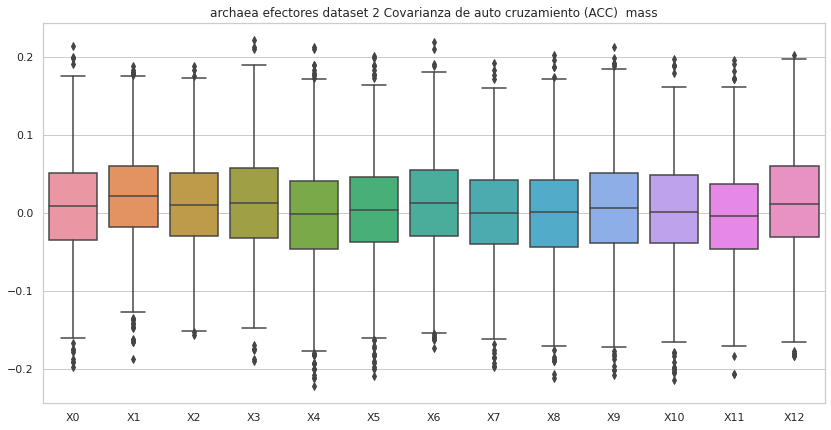

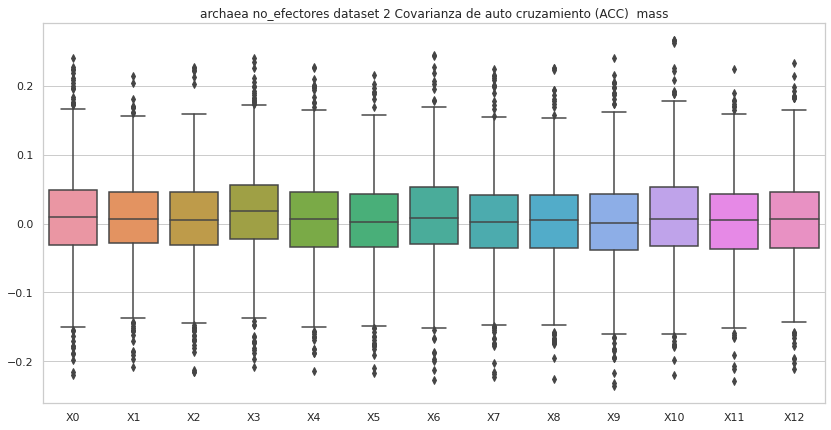

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores archaea dataset 2, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.082525  0.046163  0.024685  0.021231 -0.042095 -0.003890 -0.100917   
1    0.131098 -0.028597  0.154758  0.169085  0.117067 -0.021076  0.101543   
2    0.048496  0.025507  0.064423  0.102697  0.002263 -0.015332  0.070060   
3    0.082444  0.074506  0.060104  0.117511  0.026384 -0.051381 -0.055270   
4    0.143698 -0.160690  0.019492  0.012487 -0.136476 -0.156022  0.014325   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.083275  0.046875  0.038874  0.075819  0.068174  0.100438 -0.014336   
996  0.042503  0.000670  0.003545 -0.058447  0.075533  0.008006  0.018239   
997  0.069936  0.135565  0.145020  0.161899 -0.024660  0.000620 -0.040247   
998 -0.095351 -0.158566  0.032330  0.003219 -0.159586  0.083778  0.121088   
999  0.078567  0.066

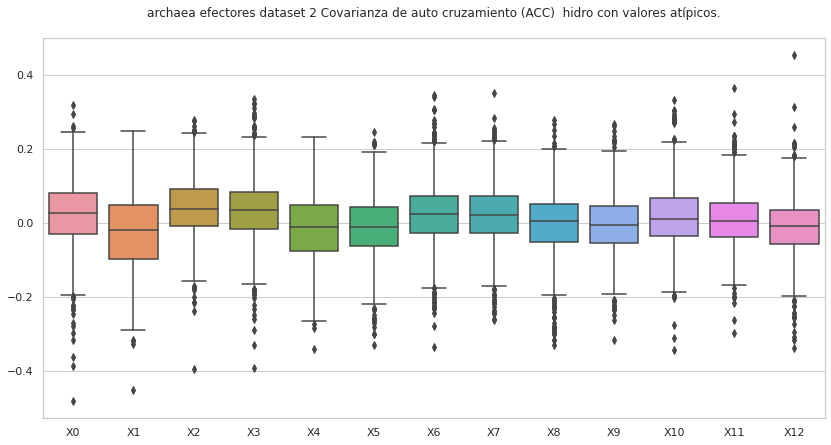

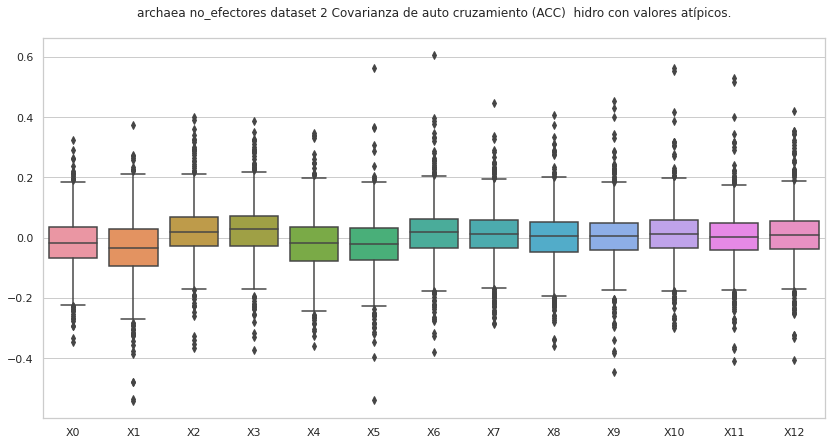

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores archaea dataset 2, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.082525  0.046163  0.024685  0.021231 -0.042095 -0.003890 -0.100917   
1    0.131098 -0.028597  0.154758  0.169085  0.117067 -0.021076  0.101543   
2    0.048496  0.025507  0.064423  0.102697  0.002263 -0.015332  0.070060   
3    0.082444  0.074506  0.060104  0.117511  0.026384 -0.051381 -0.055270   
4    0.143698 -0.160690  0.019492  0.012487 -0.136476 -0.156022  0.014325   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.083275  0.046875  0.038874  0.075819  0.068174  0.100438 -0.014336   
996  0.042503  0.000670  0.003545 -0.058447  0.075533  0.008006  0.018239   
997  0.069936  0.135565  0.145020  0.161899 -0.024660  0.000620 -0.040247   
998 -0.095351 -0.158566  0.032330  0.003219 -0.159586  0.083778  0.121088   
999  0.078567  0.066573  0

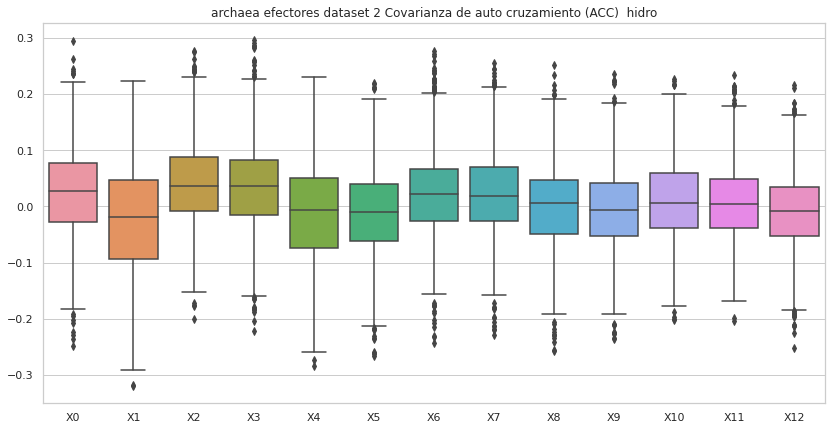

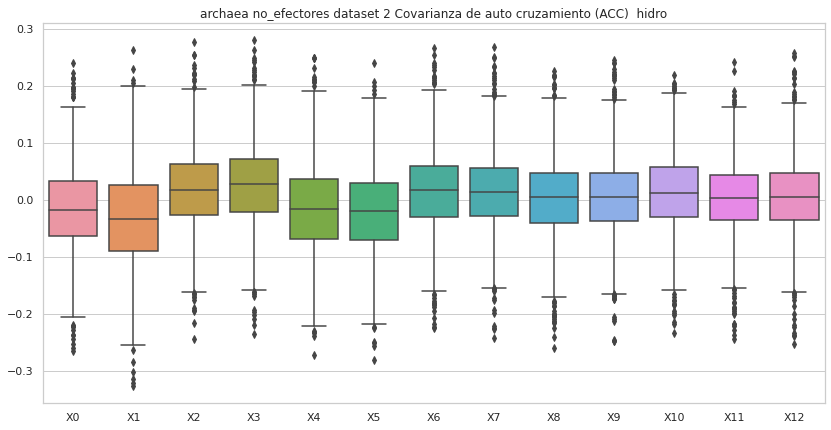

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))